In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
test=pd.read_csv('BK_test.csv')
train=pd.read_csv('BK_train.csv')

In [3]:
print('Shape of test dataset: ',test.shape)
print('Shape of train dataset: ',train.shape)

Shape of test dataset:  (233599, 11)
Shape of train dataset:  (550068, 12)


In [4]:
test.head(4)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN


In [5]:
train.head(4)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057


In [6]:
test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [7]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

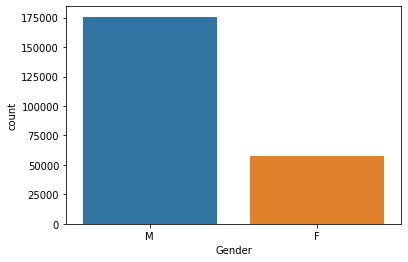

In [8]:
sns.countplot(test['Gender'])

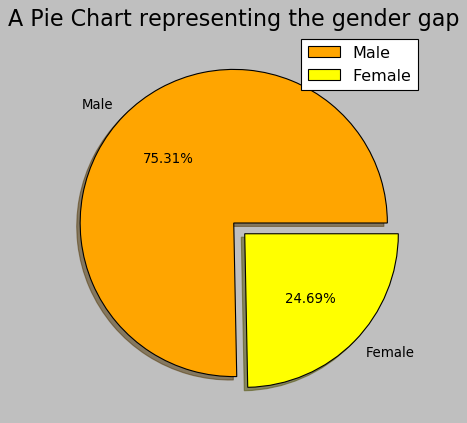

In [36]:
size = train['Gender'].value_counts()
labels = ['Male', 'Female']
colors = ['orange', 'yellow']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('_classic_test')
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [9]:
test.Occupation.value_counts()

4     30778
0     29212
7     24994
1     20261
17    17375
20    14278
12    13269
14    11473
2     11408
16    10751
6      8747
3      7476
10     5374
5      5196
15     5191
11     5007
19     3458
13     3325
18     2745
9      2638
8       643
Name: Occupation, dtype: int64

In [10]:
test.City_Category.value_counts()

B    98566
C    72509
A    62524
Name: City_Category, dtype: int64

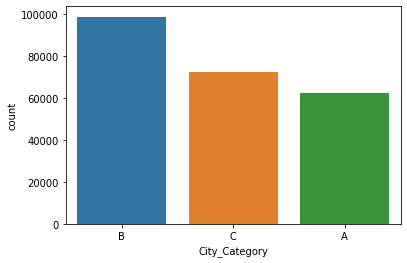

In [11]:
sns.countplot(test['City_Category'])

In [12]:
sns.countplot(df['Gender'])

NameError: name 'df' is not defined

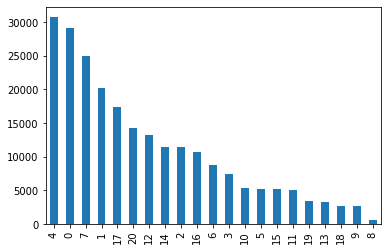

In [13]:
test['Occupation'].value_counts().plot(kind='bar');

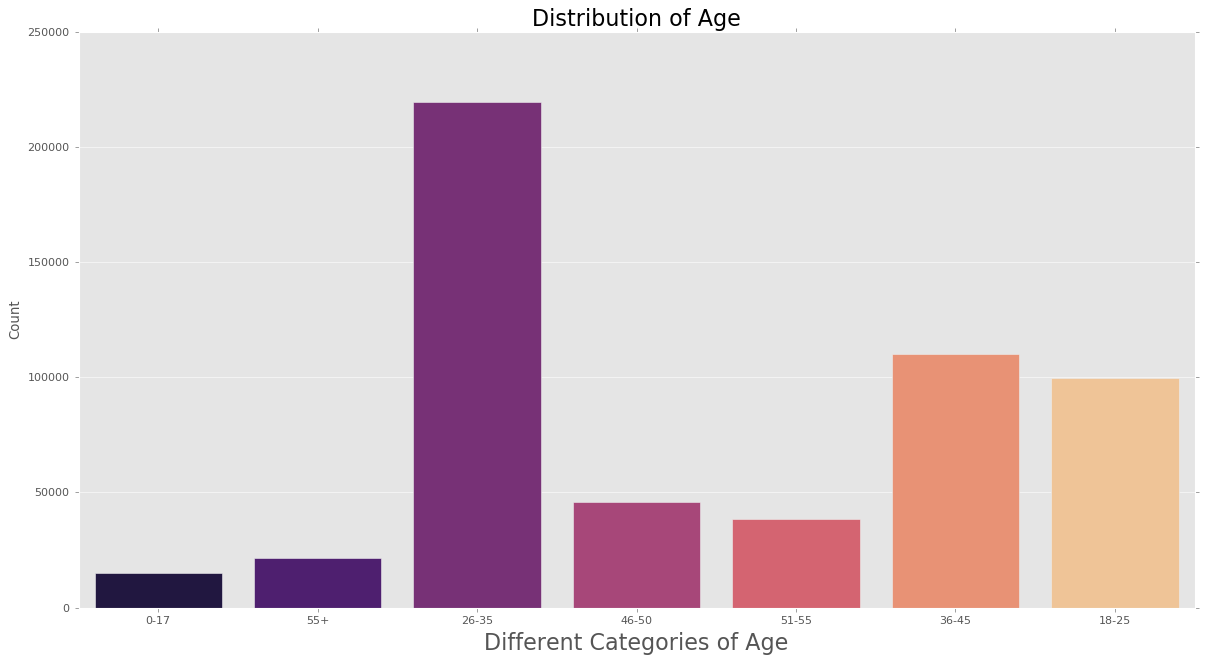

In [37]:

plt.rcParams['figure.figsize'] = (18, 9)
plt.style.use('ggplot')

sns.countplot(train['Age'], palette = 'magma')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Different Categories of Age', fontsize = 20)
plt.ylabel('Count')
plt.show()

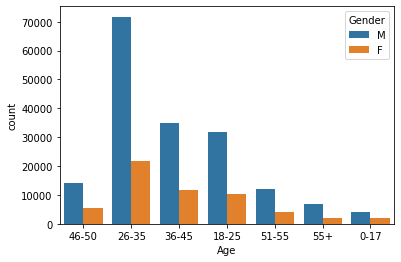

In [15]:
sns.countplot(test['Age'],hue=test['Gender'])

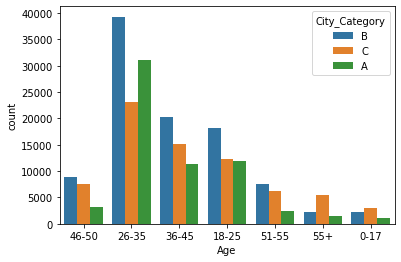

In [16]:
sns.countplot(test['Age'],hue=test['City_Category'])

In [17]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

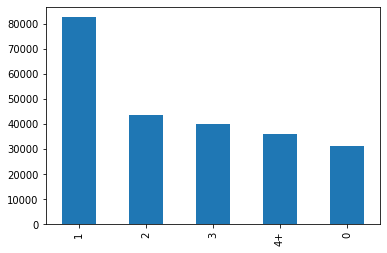

In [18]:
test['Stay_In_Current_City_Years'].value_counts().plot(kind='bar');

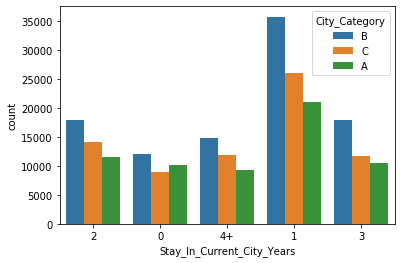

In [19]:
sns.countplot(test['Stay_In_Current_City_Years'],hue=test['City_Category'])

In [20]:
## combining Gender and Martial Status
df['combined_G_M'] = df.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(df['combined_G_M'].unique())


NameError: name 'df' is not defined

In [21]:
sns.countplot(df['Age'],hue=df['combined_G_M'])

NameError: name 'df' is not defined

In [25]:
print('Product_Category_2', train['Product_Category_2'].unique())
print('-----------------------------------------------------------------------------------')
print('Product_Category_3', train['Product_Category_3'].unique())

Product_Category_2 [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
-----------------------------------------------------------------------------------
Product_Category_3 [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [26]:
## So all values are in integer range. May be we can assign value zero for the NaN cases
train.fillna(value=0,inplace=True)
## Also looks like the product categories are float while they can be int.
train["Product_Category_2"] = train["Product_Category_2"].astype(int)
train["Product_Category_3"] = train["Product_Category_3"].astype(int)
print('Product_Category_2', train['Product_Category_2'].unique())
print('-----------------------------------------------------------------------------------')
print('Product_Category_3', train['Product_Category_3'].unique())

Product_Category_2 [ 0  6 14  2  8 15 16 11  5  3  4 12  9 10 17 13  7 18]
-----------------------------------------------------------------------------------
Product_Category_3 [ 0 14 17  5  4 16 15  8  9 13  6 12  3 18 11 10]


In [27]:
train.info

<bound method DataFrame.info of         User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0     

In [28]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,6.735436,3.841941,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,6.215492,6.250712,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,0.000000,0.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,5.000000,0.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [29]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [30]:
train.drop(['User_ID','Product_ID'],axis=1)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0,0,8370
1,F,0-17,10,A,2,0,1,6,14,15200
2,F,0-17,10,A,2,0,12,0,0,1422
3,F,0-17,10,A,2,0,12,14,0,1057
4,M,55+,16,C,4+,0,8,0,0,7969
...,...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,0,0,368
550064,F,26-35,1,C,3,0,20,0,0,371
550065,F,26-35,15,B,4+,1,20,0,0,137
550066,F,55+,1,C,2,0,20,0,0,365


In [31]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc31d47b9d0>,
      dtype=object)

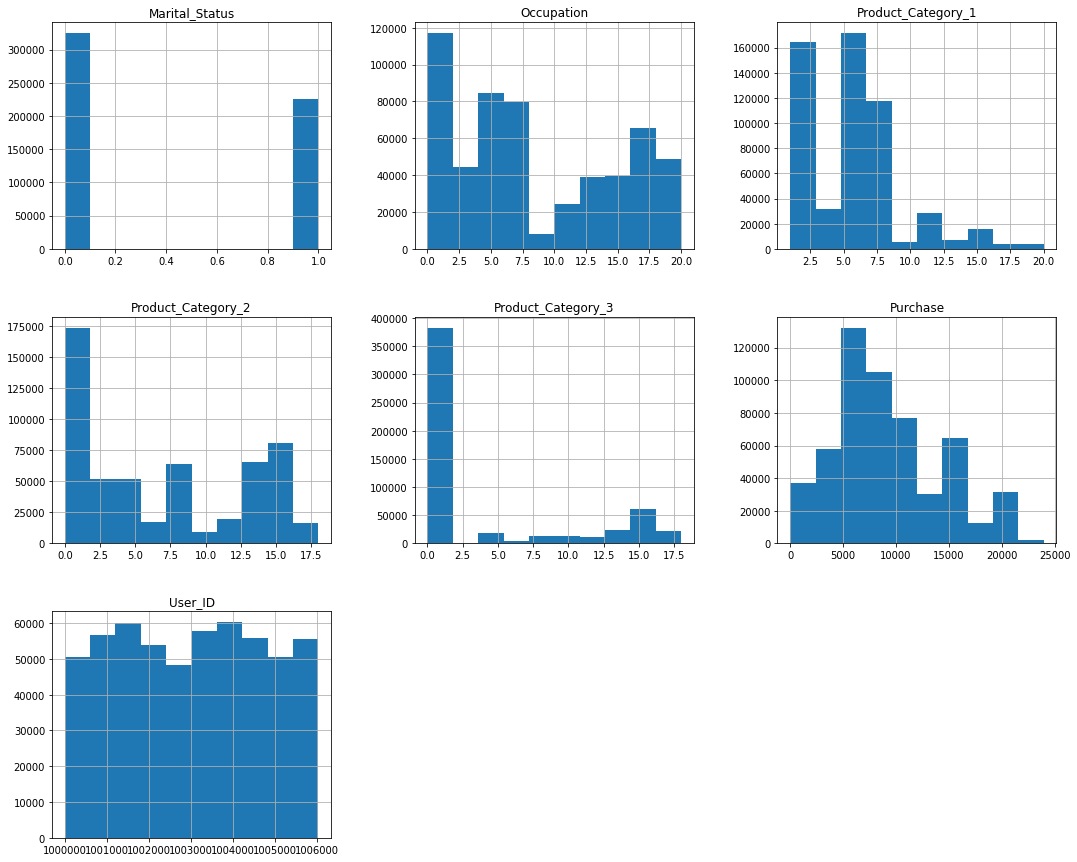

In [32]:
train.hist(figsize=(18,15))

In [33]:
a=train['Purchase'].mean()

In [35]:

train[['City_Category', 'Purchase']].groupby('City_Category').mean()

,Purchase
City_Category,
A,8911.939216
B,9151.300563
C,9719.920993


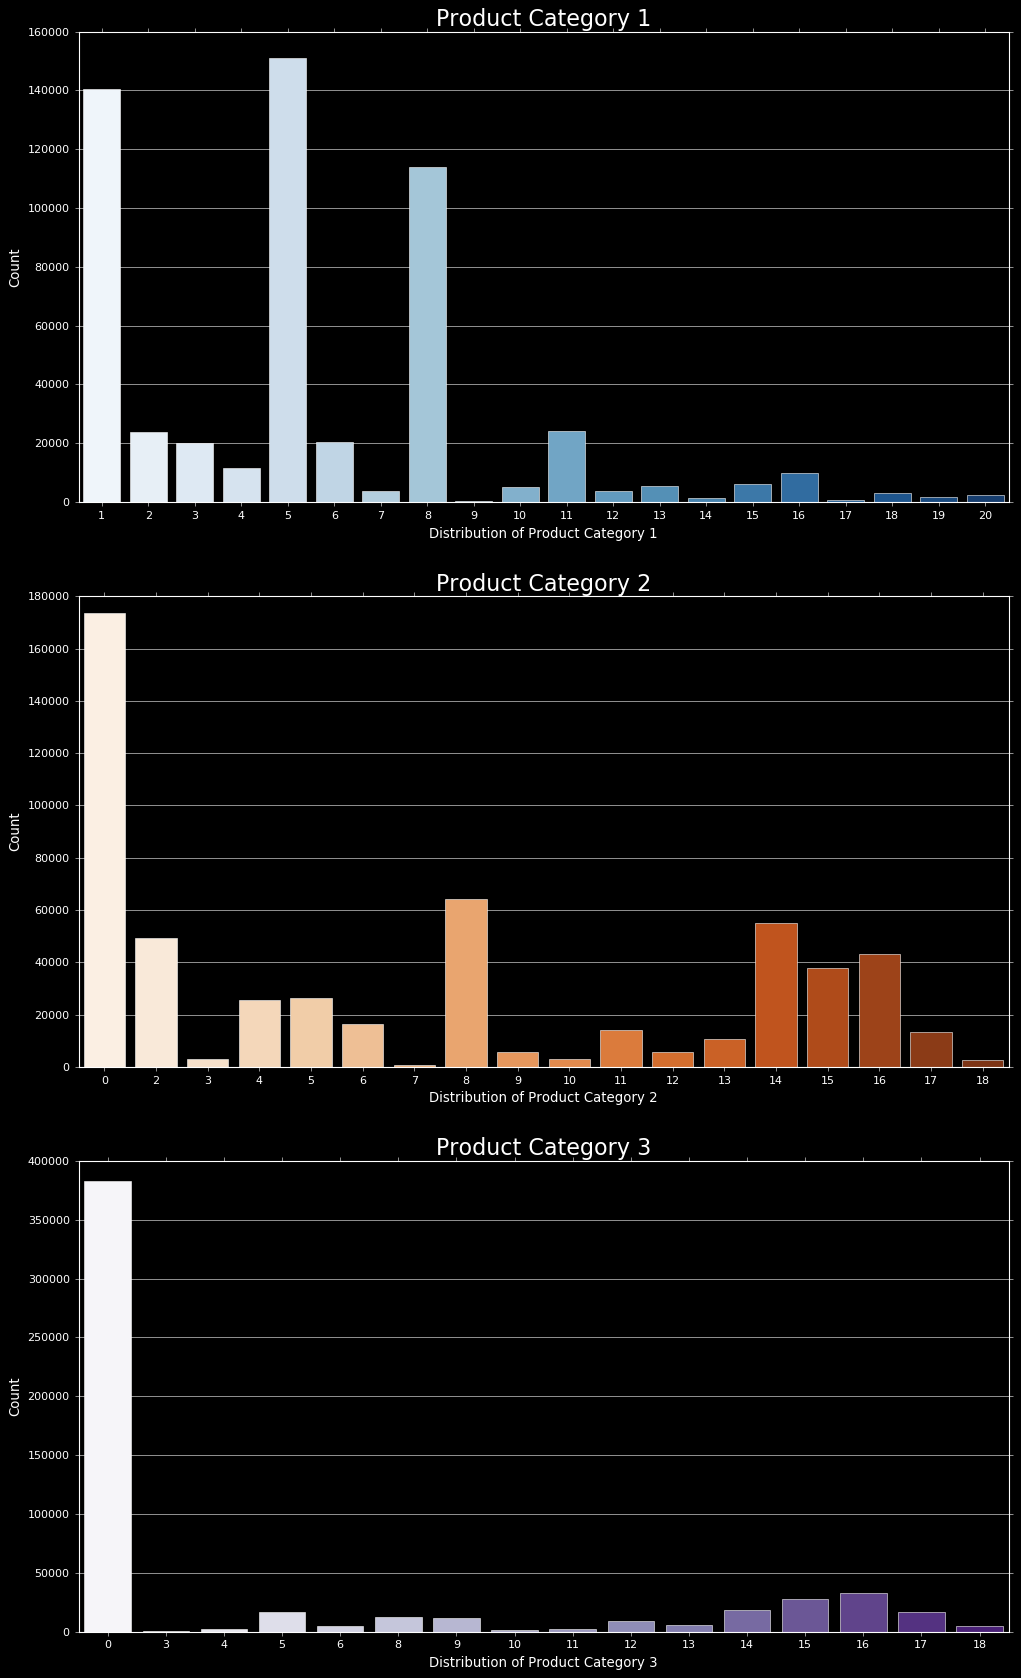

In [39]:
plt.rcParams['figure.figsize'] = (15, 25)
plt.style.use('dark_background')

plt.subplot(3, 1, 1)
sns.countplot(train['Product_Category_1'], palette = 'Blues')
plt.title('Product Category 1', fontsize = 20)
plt.xlabel('Distribution of Product Category 1')
plt.ylabel('Count')

plt.subplot(3, 1, 2)
sns.countplot(train['Product_Category_2'], palette = 'Oranges')
plt.title('Product Category 2', fontsize = 20)
plt.xlabel('Distribution of Product Category 2')
plt.ylabel('Count')

plt.subplot(3, 1, 3)
sns.countplot(train['Product_Category_3'], palette = 'Purples')
plt.title('Product Category 3', fontsize = 20)
plt.xlabel('Distribution of Product Category 3')
plt.ylabel('Count')

plt.show()

# DATA PREPROCESSING

In [56]:




train = train.drop(['Stay_In_Current_City_Years'], axis = 1)

In [57]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train['Gender'] = le.fit_transform(train['Gender'])
train['City_Category'] = le.fit_transform(train['City_Category'])
train['Age'] = le.fit_transform(train['Age'])

In [71]:
train.head(3)

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,0,3,0,0,8370
1,0,0,10,0,0,1,6,14,15200
2,0,0,10,0,0,12,0,0,1422


In [58]:
y = train['Purchase']

# now removing the purchase column from the dataset
data = train.drop(['Purchase'], axis = 1)

x = train

# checking the shapes of x and y
print("Shape of x: ", train.shape)
print("Shape of y: ", train.shape)

Shape of x:  (550068, 9)
Shape of y:  (550068, 9)


In [59]:
x.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Purchase'],
      dtype='object')

In [60]:
x.shape

(550068, 9)

In [61]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (385047, 9)
Shape of x_test:  (165021, 9)
Shape of y_train:  (385047,)
Shape of y_test:  (165021,)


Scaling the data

In [62]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# MOdelling

In [68]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = Ridge()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 0.014187720157255203
R2 Score: 0.99999999999206


In [67]:

from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = ElasticNet()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 1679.923625890976
R2 Score: 0.888680327359474


In [72]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(x_train,y_train)
y_pred=lin.predict(x_test)


In [73]:
print('Training Set Score:{:.2f}'.format(lin.score(x_train,y_train)))
print('Test set Score:{:.2f}'.format(lin.score(x_test,y_test)))

Training Set Score:1.00
Test set Score:1.00
